### Question 1. Write a program to read contents of file and create and apply appropriate regular expressions to prepare following output and also stored it in dictionary with roll numbers as key and other details as values. 

In [2]:
import re

In [3]:
file=open("VA3.txt","r")
content=file.read()
file.close()
content

'N283 Divyansh Tiwari divyansh_tiwari@rocketmail.com 8890508659 70471118091 https://www.linkedin.com/in/dt03 3.79/4.00 N288 Akanksha Yadav akankshaayadav19@gmail.com 70471118096 3.90/4.00 N269 Rahul Sharma rsharma5500@gmail.com https://www.linkedin.com/in/rsharma5500/ 3.70/4.00'

In [4]:
Roll_nos = re.findall("N\d\d\d", content)
print(Roll_nos)
details = re.split("N\d\d\d", content)[1:]
print(details)

['N283', 'N288', 'N269']
[' Divyansh Tiwari divyansh_tiwari@rocketmail.com 8890508659 70471118091 https://www.linkedin.com/in/dt03 3.79/4.00 ', ' Akanksha Yadav akankshaayadav19@gmail.com 70471118096 3.90/4.00 ', ' Rahul Sharma rsharma5500@gmail.com https://www.linkedin.com/in/rsharma5500/ 3.70/4.00']


In [5]:
students={}
for i,j in zip(Roll_nos,details):
    email = re.findall('\S+@\S+', j)
    SAP= re.findall('\s\d{11}\s',j)
    phone= re.findall('\s\d{10}\s',j)
    name= re.findall('\s[A-Za-z]+\s[A-Za-z]+\s',j)
    linkedin= re.findall(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))",j)
    gpa=re.findall(r'\d[.]\d{2}[/]\d[.]\d{2}',j)
    students[i]={
        "Name":name[0],
        "SAP ID":SAP[0] if SAP else "Not Avaliable",
        "Email":email[0] if email else "Not Avaliable",
        "Contact":phone[0] if phone else "Not Avaliable",
        "LinkedIn":linkedin[0][0] if linkedin else "Not Avaliable",
        "GPA": gpa[0]
    }

In [6]:
students

{'N283': {'Name': ' Divyansh Tiwari ',
  'SAP ID': ' 70471118091 ',
  'Email': 'divyansh_tiwari@rocketmail.com',
  'Contact': ' 8890508659 ',
  'LinkedIn': 'https://www.linkedin.com/in/dt03',
  'GPA': '3.79/4.00'},
 'N288': {'Name': ' Akanksha Yadav ',
  'SAP ID': ' 70471118096 ',
  'Email': 'akankshaayadav19@gmail.com',
  'Contact': 'Not Avaliable',
  'LinkedIn': 'Not Avaliable',
  'GPA': '3.90/4.00'},
 'N269': {'Name': ' Rahul Sharma ',
  'SAP ID': 'Not Avaliable',
  'Email': 'rsharma5500@gmail.com',
  'Contact': 'Not Avaliable',
  'LinkedIn': 'https://www.linkedin.com/in/rsharma5500/',
  'GPA': '3.70/4.00'}}

In [7]:
students['N283']['Name']

' Divyansh Tiwari '

### Question 2. Design Bar chart to display ranking of students as poor, Above Average, Very Good and Excellent, with Name on X-axis. 

In [8]:
import pandas as pd

In [9]:
df=pd.DataFrame.from_dict(students).T
df.head()

,Name,SAP ID,Email,Contact,LinkedIn,GPA
N283,Divyansh Tiwari,70471118091,divyansh_tiwari@rocketmail.com,8890508659,https://www.linkedin.com/in/dt03,3.79/4.00
N288,Akanksha Yadav,70471118096,akankshaayadav19@gmail.com,Not Avaliable,Not Avaliable,3.90/4.00
N269,Rahul Sharma,Not Avaliable,rsharma5500@gmail.com,Not Avaliable,https://www.linkedin.com/in/rsharma5500/,3.70/4.00


In [10]:
df['Remarks'] = ["Poor" if eval(i) < 0.5 else ( "Above Average" if eval(i) < 0.7 else ( "Very Good" if eval(i) < 0.9 else "Excellent" ) ) for i in df.GPA]
df

,Name,SAP ID,Email,Contact,LinkedIn,GPA,Remarks
N283,Divyansh Tiwari,70471118091,divyansh_tiwari@rocketmail.com,8890508659,https://www.linkedin.com/in/dt03,3.79/4.00,Excellent
N288,Akanksha Yadav,70471118096,akankshaayadav19@gmail.com,Not Avaliable,Not Avaliable,3.90/4.00,Excellent
N269,Rahul Sharma,Not Avaliable,rsharma5500@gmail.com,Not Avaliable,https://www.linkedin.com/in/rsharma5500/,3.70/4.00,Excellent


In [11]:
df['Equi'] = [1 if i == "Poor" else ( 2 if i == "Above Average" else ( 3 if i == "Very Good" else 4 ) ) for i in df.Remarks]
df.Equi

N283    4
N288    4
N269    4
Name: Equi, dtype: int64

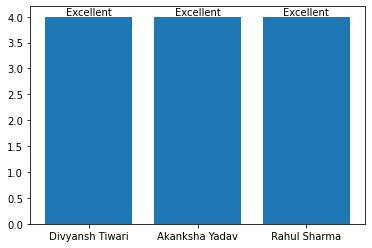

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.bar(df["Name"],df["Equi"])

rects = ax.patches

for rect, label in zip(rects, df["Remarks"]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom')